# Feature transformations

* Feature scaling
* Non-linear transformations
* Binarization
* Coordinates
* Date and time
* Tranzaktions

## Feature scaling

**Standart scaling**

$$z = \frac{x - \mu}{\sigma}$$

* smooths outliers
* always used in distance-based algorithms

In [12]:
from sklearn.preprocessing import StandardScaler 
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

data = np.array([1, 1, 0, -1, 2, 1, 2, 3, -2, 4, 100]).reshape(-1, 1).astype(np.float64)

StandardScaler().fit_transform(data)

array([[-0.31922662],
       [-0.31922662],
       [-0.35434155],
       [-0.38945648],
       [-0.28411169],
       [-0.31922662],
       [-0.28411169],
       [-0.24899676],
       [-0.42457141],
       [-0.21388184],
       [ 3.15715128]])

**Normalization - MiniMax Scaling** - rescaling feature to [0,1] scale.

$$z=\frac{x-x_{min}}{x_{max}-x_{min}}$$

Appropriate when we need features in a limited range.

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
MinMaxScaler().fit_transform(data)

array([[0.02941176],
       [0.02941176],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.02941176],
       [0.03921569],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.        ]])

## Nonlinear transformations

**Rescaling to normal distribution** - for lognorm features or for features with heavy right tail. 

$$z = log(x)$$

Commonly used with salary, population and etc.

In [117]:
from scipy.stats import lognorm

data = lognorm(s=1).rvs(500)

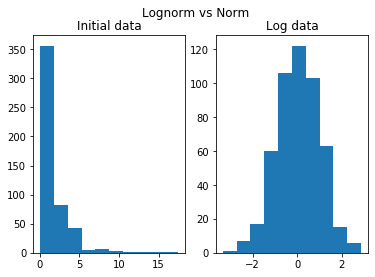

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Lognorm vs Norm')
ax1.hist(data)
ax1.set_title('Initial data')
ax2.hist(np.log(data))
ax2.set_title('Log data')
plt.show()

**Q-Q plots** - to quickly check data normality.

Normal distribution on this graphs will be a diagonal from left bottom corner to right top corner. If you want to check normlity strictly, use shapiro-wilk criterion.

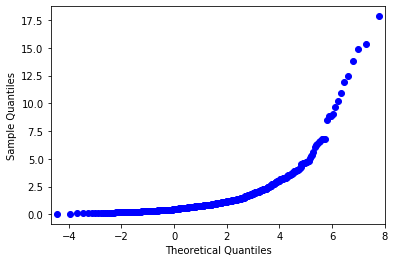

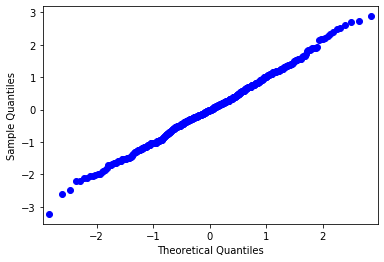

In [134]:
import statsmodels.api as sm

data = lognorm(s=1).rvs(500)
data_log = np.log(data)

ax1 = sm.qqplot(data, loc=data.mean(), scale=data.std())
ax2 = sm.qqplot(data_log, loc=data_log.mean(), scale=data_log.std())

**Polynomail features** - create from features $x_1, x_2, \dots$ polynomial of a certain degree: $x_1^2, x_2^2, x_1x_2 \dots$.

Commonly used if linear models give bad results.

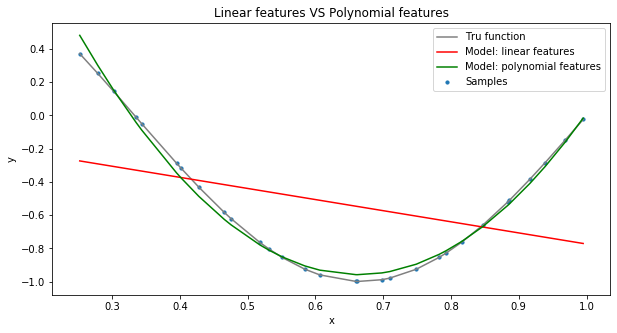

In [110]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt
%matplotlib inline

x = np.linspace(0.25,1, num=30) + np.random.normal(0, 0.01, 30)
y = np.cos(1.5 * math.pi * x)

x = x[:, np.newaxis]
y = y[:, np.newaxis]


# without polynomial features
skm = LinearRegression()
skm.fit(x, y)
y_pred = skm.predict(x)

# with polynomial features
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

skm2 = LinearRegression()
skm2.fit(x_poly, y)
y_poly_pred = skm2.predict(x_poly)

plt.figure(figsize=(10,5))
plt.scatter(x,y,s=10, label='Samples')
plt.plot(x, y, color='gray', label='Tru function')
plt.plot(x, y_pred, color='r', label='Model: linear features')
plt.plot(x, y_poly_pred, color='g', label='Model: polynomial features')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear features VS Polynomial features')
plt.show;

**Periodical features** - for features the values of which are repeated with a certain periodicity:
    
$$z=sin(\frac{x}{T})$$

**Exponential features** - for measuring distance to the point:
    
$$z=exp(\frac{||x-\mu||^2}{\sigma})$$

## Binarization 

Divide the values of the feature into bins and add for each bin a new sign-indicator of getting into this bin.

Can help the linear model look for non-linear dependencies.

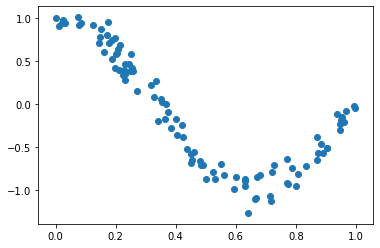

In [5]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

np.random.seed(36)
X = np.random.uniform(0, 1, size=100)
y = np.cos(1.5 * np.pi * X) + np.random.normal(scale=0.1, size=X.shape)

plt.scatter(X, y);

In [6]:
X = X.reshape((-1, 1))

thresholds = np.arange(0.2, 1.1, 0.2).reshape((1, -1))

X_expand = np.hstack((X, ((X > thresholds[:, :-1]) & (X <= thresholds[:, 1:])).astype(int)))

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [8]:
-np.mean(cross_val_score(LinearRegression(), X, y, cv=KFold(n_splits=3, random_state=123),
                         scoring='neg_mean_squared_error'))

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.20553980048560805

In [9]:
-np.mean(cross_val_score(
    LinearRegression(), X_expand, y, cv=KFold(n_splits=3, random_state=123),
    scoring='neg_mean_squared_error'))

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.05580385745900116

## Delete samples with big error on training dataset